In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [6]:
df = pd.read_csv("../data/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df["target"].value_counts()


target
1    526
0    499
Name: count, dtype: int64

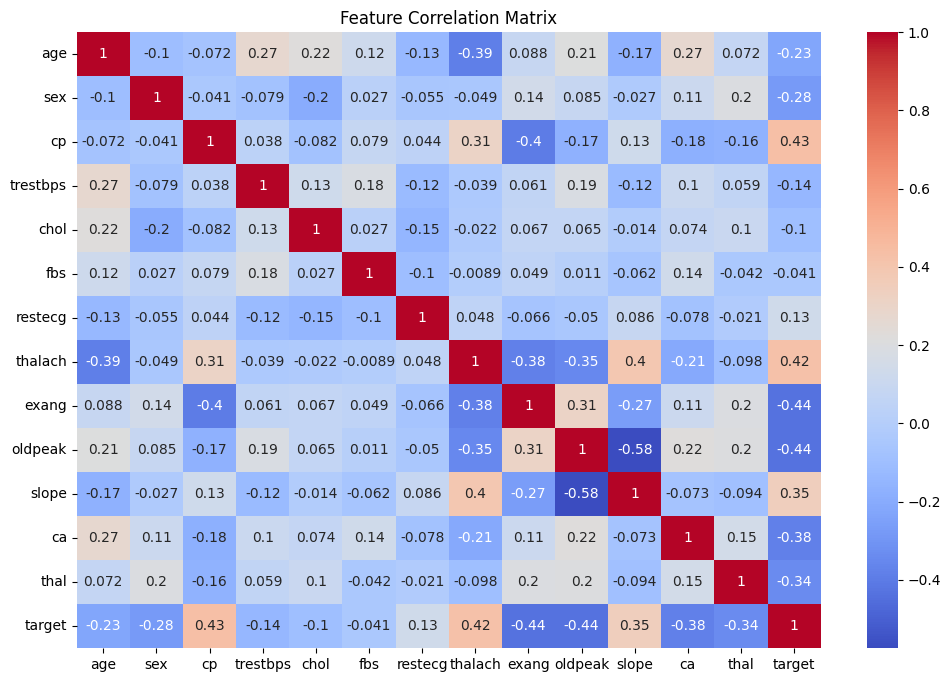

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [11]:
X = df.drop("target", axis=1)
y = df["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (820, 13)
Testing size: (205, 13)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)


In [14]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, log_preds))
print("AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

AUC: 0.8787359604035789


In [17]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create scaler
scaler = StandardScaler()

# Fit scaler on FULL dataset
X_scaled = scaler.fit_transform(X)

# Train model on scaled data
final_model = LogisticRegression(max_iter=5000)
final_model.fit(X_scaled, y)

# Save BOTH model and scaler
joblib.dump(final_model, "heart_disease_model.pkl")
joblib.dump(scaler, "heart_scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [18]:
import joblib

model = joblib.load("heart_disease_model.pkl")
scaler = joblib.load("heart_scaler.pkl")

sample = X.iloc[[0]]
sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)

print(prediction)


[0]


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model, X_scaled, y, cv=5)

print("Cross Validation Scores:", scores)
print("Average CV Accuracy:", scores.mean())


Cross Validation Scores: [0.88292683 0.85365854 0.86341463 0.82439024 0.80487805]
Average CV Accuracy: 0.8458536585365855


In [20]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.8707317073170732
Test Accuracy: 0.8146341463414634


In [21]:
y.value_counts(normalize=True)


target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

print("Train:", rf.score(X_train, y_train))
print("Test:", rf.score(X_test, y_test))

cv_scores = cross_val_score(rf, X, y, cv=5)
print("CV Mean:", cv_scores.mean())


Train: 1.0
Test: 0.9853658536585366
CV Mean: 0.9970731707317073


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print("Train:", gb.score(X_train, y_train))
print("Test:", gb.score(X_test, y_test))


Train: 0.9829268292682927
Test: 0.9317073170731708


In [25]:
pip install xgboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.7 MB 1.8 MB/s eta 0:00:56
   ---------------------------------------- 0.8/101.7 MB 2.2 MB/s eta 0:00:46
    --------------------------------------- 1.8/101.7 MB 3.3 MB/s eta 0:00:31
   - -------------------------------------- 2.6/101.7 MB 3.2 MB/s eta 0:00:31
   - -------------------------------------- 3.4/101.7 MB 3.2 MB/s eta 0:00:31
   - -------------------------------------- 4.2/101.7 MB 3.4 MB/s eta 0:00:29
   - -------------------------------------- 4.7/101.7 MB 3.4 MB/s eta 0:00:29
   -- ------------------------------------- 5.8/101.7 MB 3.4 MB/s eta 0:00:28
   -- ------------------------------------- 6.6/101.7 MB 3.4 MB/s eta 0:00:28
   -- ------------------------------------- 7.3/101.7 MB 3.4 MB/s eta 0:00:28
   --- 

In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

print("Train:", xgb.score(X_train, y_train))
print("Test:", xgb.score(X_test, y_test))


Train: 1.0
Test: 0.9853658536585366


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid = GridSearchCV(
    XGBClassifier(eval_metric='logloss'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 400}
Best CV Score: 0.9817073170731707


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

df = pd.read_csv("../data/heart.csv")
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
X = df.drop("target", axis=1)
y = df["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_scaled, y_train)

print("Train Accuracy:", xgb.score(X_train_scaled, y_train))
print("Test Accuracy:", xgb.score(X_test_scaled, y_test))


Train Accuracy: 1.0
Test Accuracy: 1.0


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=4,
        eval_metric='logloss',
        random_state=42
    ))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5)

print("CV Scores:", cv_scores)
print("CV Mean:", cv_scores.mean())


CV Scores: [0.9804878  1.         1.         1.         0.98536585]
CV Mean: 0.9931707317073171


In [9]:
df.shape
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.corr()["target"].sort_values(ascending=False)


target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

In [11]:
print("Columns in X:")
print(X.columns)


Columns in X:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='str')


In [12]:
df.shape


(1025, 14)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = xgb.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[100   0]
 [  0 105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [14]:
df.duplicated().sum()


np.int64(723)

In [15]:
df = df.drop_duplicates()
print(df.shape)


(302, 14)


In [16]:
X = df.drop("target", axis=1)
y = df["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_scaled, y_train)

print("Train Accuracy:", xgb.score(X_train_scaled, y_train))
print("Test Accuracy:", xgb.score(X_test_scaled, y_test))


Train Accuracy: 1.0
Test Accuracy: 0.7377049180327869


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=4,
        eval_metric='logloss',
        random_state=42
    ))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5)

print("CV Scores:", cv_scores)
print("CV Mean:", cv_scores.mean())


CV Scores: [0.80327869 0.81967213 0.83333333 0.8        0.71666667]
CV Mean: 0.7945901639344262


In [21]:
df.duplicated().sum()


np.int64(0)

In [22]:
df.shape

(302, 14)

In [23]:
xgb = XGBClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=2,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)


In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000)

lr.fit(X_train_scaled, y_train)

print("Train:", lr.score(X_train_scaled, y_train))
print("Test:", lr.score(X_test_scaled, y_test))


Train: 0.8589211618257261
Test: 0.8032786885245902


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=4,
        eval_metric='logloss',
        random_state=42
    ))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5)

print("CV Scores:", cv_scores)
print("CV Mean:", cv_scores.mean())


CV Scores: [0.80327869 0.81967213 0.83333333 0.8        0.71666667]
CV Mean: 0.7945901639344262


In [27]:
    from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=5000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)

print("Best C:", grid.best_params_)
print("CV Score:", grid.best_score_)


IndentationError: unexpected indent (2829269715.py, line 1)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=3,
    min_samples_split=5,
    random_state=42
)

rf.fit(X_train, y_train)

print("Train:", rf.score(X_train, y_train))
print("Test:", rf.score(X_test, y_test))


Train: 0.8879668049792531
Test: 0.8032786885245902


In [29]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [30]:
sample = X_test.iloc[[0]]
sample_scaled = scaler.transform(sample)

prediction = lr.predict(sample_scaled)
probability = lr.predict_proba(sample_scaled)

print("Prediction:", prediction)
print("Probability:", probability)


Prediction: [0]
Probability: [[0.81460259 0.18539741]]


In [31]:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='str')
